In [1]:
!pip install kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 1.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105789 sha256=b630d771c6dbbd55b0fff5ae0558e17be022e3e7c9396f2bc118271669c5f54d
  Stored in directory: /Users/amansahu/Library/Caches/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2020.4.5.1
    Uninstalling certifi-2020.4.5.1:
      Successfully uninstalled certifi-2020.4.5.1

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
#data set

!kaggle datasets download -d asaniczka/1-3m-linkedin-jobs-and-skills-2024
#unzip the file to access contents
!unzip 1-3m-linkedin-jobs-and-skills-2024.zip

Dataset URL: https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024
License(s): ODC Attribution License (ODC-By)
100%|█████████████████████████████████████▉| 1.87G/1.88G [01:00<00:00, 34.6MB/s]
100%|██████████████████████████████████████| 1.88G/1.88G [01:00<00:00, 33.4MB/s]
Archive:  1-3m-linkedin-jobs-and-skills-2024.zip
  inflating: job_skills.csv          
  inflating: job_summary.csv         
  inflating: linkedin_job_postings.csv  


In [1]:
import pandas as pd

In [2]:
job_skills = pd.read_csv("job_skills.csv")

In [3]:
job_posting = pd.read_csv("linkedin_job_postings.csv")

In [4]:
job_skills.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [5]:
job_posting.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [6]:
job_posting = pd.merge(job_posting, job_skills, on = 'job_link', how = 'inner') 

In [7]:
job_posting.head(2)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,"Medical equipment sales, Key competitors, Term..."
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,"Nursing, Bachelor of Science in Nursing, Maste..."


In [8]:
job_posting.isna().sum()

job_link                  0
last_processed_time       0
got_summary               0
got_ner                   0
is_being_worked           0
job_title                 0
company                   9
job_location             19
first_seen                0
search_city               0
search_country            0
search_position           0
job_level                 0
job_type                  0
job_skills             2035
dtype: int64

In [9]:
job_posting = job_posting.dropna()

In [10]:
job_posting.isna().sum()

job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
job_skills             0
dtype: int64

In [11]:
#lower case
job_posting = job_posting.applymap(lambda s:s.lower() if type(s) == str else s)

In [ ]:
job_posting = job_posting.replace({'&' : 'and'}, regex = True)

In [13]:
job_posting.head(2)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"medical equipment sales, key competitors, term..."
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,registered nurse - rn care manager,trinity health mi,"norton shores, mi",2024-01-14,grand haven,united states,director nursing service,mid senior,onsite,"nursing, bachelor of science in nursing, maste..."


In [14]:
def iterate_skills(row):
    skills = row['job_skills'].split(',')
    skills = [skills for skills in skills if len(skills) >= 3]
    return skills

In [15]:
job_posting['skills'] = job_posting.apply(iterate_skills,axis= 1)

In [16]:
job_posting['skills_count'] = job_posting['skills'].apply(len)

In [17]:
job_posting.head(2)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills,skills_count
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"medical equipment sales, key competitors, term...","[medical equipment sales, key competitors, t...",26
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,registered nurse - rn care manager,trinity health mi,"norton shores, mi",2024-01-14,grand haven,united states,director nursing service,mid senior,onsite,"nursing, bachelor of science in nursing, maste...","[nursing, bachelor of science in nursing, ma...",17


In [18]:
job_posting.drop(['job_skills'], inplace= True, axis=1)

In [19]:
job_posting = job_posting.rename(columns={'skills':'job_skills'})

In [20]:
job_posting.head(2)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"[medical equipment sales, key competitors, t...",26
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,registered nurse - rn care manager,trinity health mi,"norton shores, mi",2024-01-14,grand haven,united states,director nursing service,mid senior,onsite,"[nursing, bachelor of science in nursing, ma...",17


In [21]:
job_posting['search_country'] = job_posting['search_country'].astype('category')

In [22]:
job_posting['search_country'].cat.categories

Index(['australia', 'canada', 'united kingdom', 'united states'], dtype='object')

In [23]:
aus_jobs = job_posting[job_posting['search_country'] == 'australia']
job_counts = aus_jobs['job_title'].value_counts()
top_10_aus_job = job_counts.head(10)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

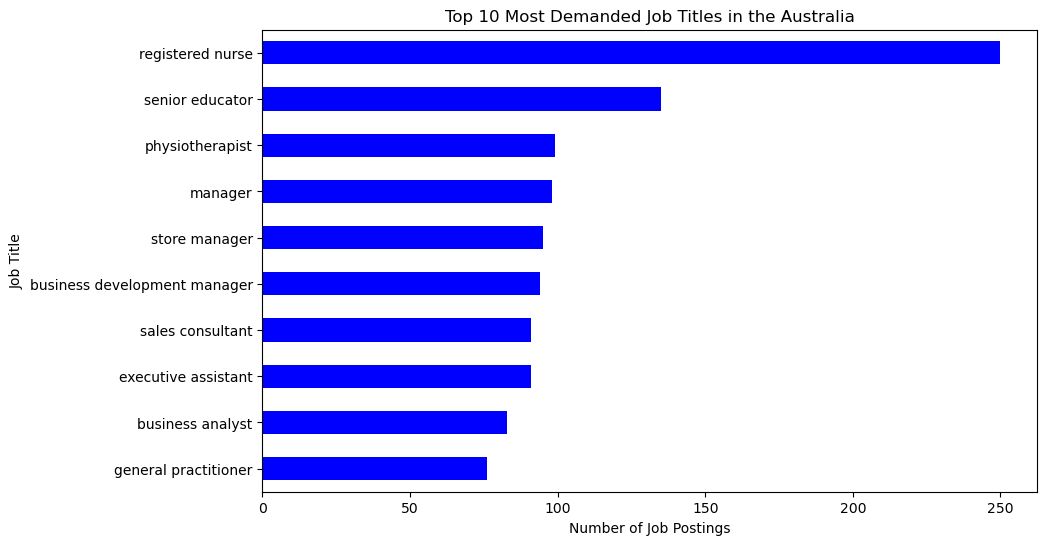

In [25]:
top_10_aus_job.plot(kind = 'barh', figsize = (10,6), color = 'blue')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.title('Top 10 Most Demanded Job Titles in the Australia')
plt.gca().invert_yaxis() 
plt.show()

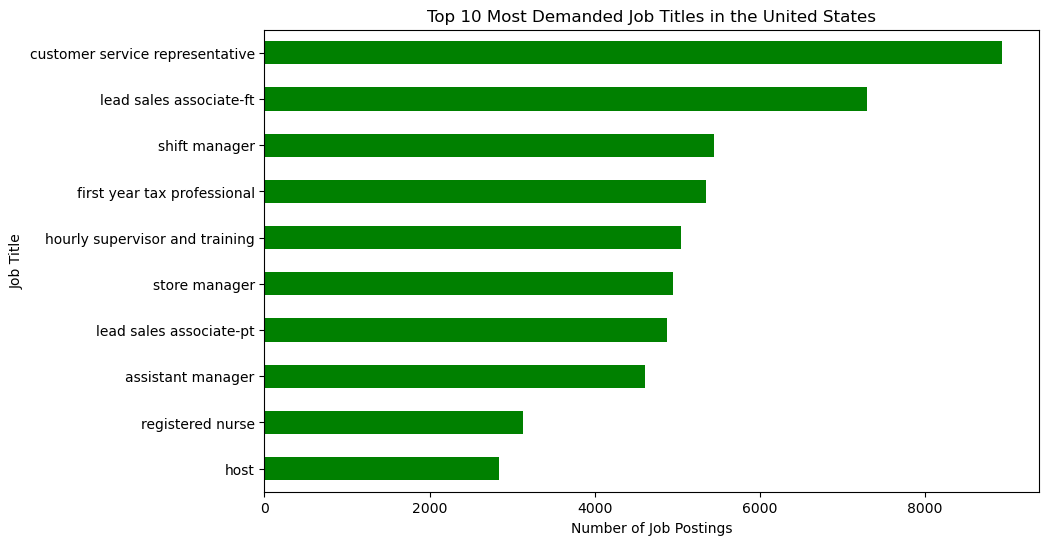

In [26]:
US_jobs = job_posting[job_posting['search_country'] == 'united states']
job_counts = US_jobs['job_title'].value_counts()
top_10_US_job = job_counts.head(10)

top_10_US_job.plot(kind = 'barh', figsize = (10,6), color = 'green')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.title('Top 10 Most Demanded Job Titles in the United States')
plt.gca().invert_yaxis() 
plt.show()

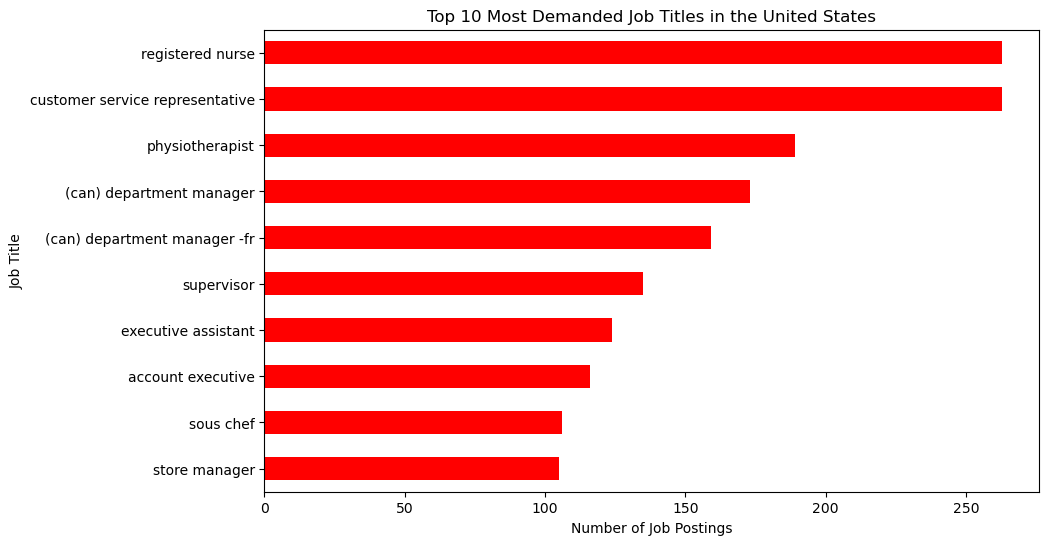

In [27]:
Canada_jobs = job_posting[job_posting['search_country'] == 'canada']
job_counts = Canada_jobs['job_title'].value_counts()
top_10_Canada_job = job_counts.head(10)

top_10_Canada_job.plot(kind = 'barh', figsize = (10,6), color = 'red')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.title('Top 10 Most Demanded Job Titles in the United States')
plt.gca().invert_yaxis() 
plt.show()

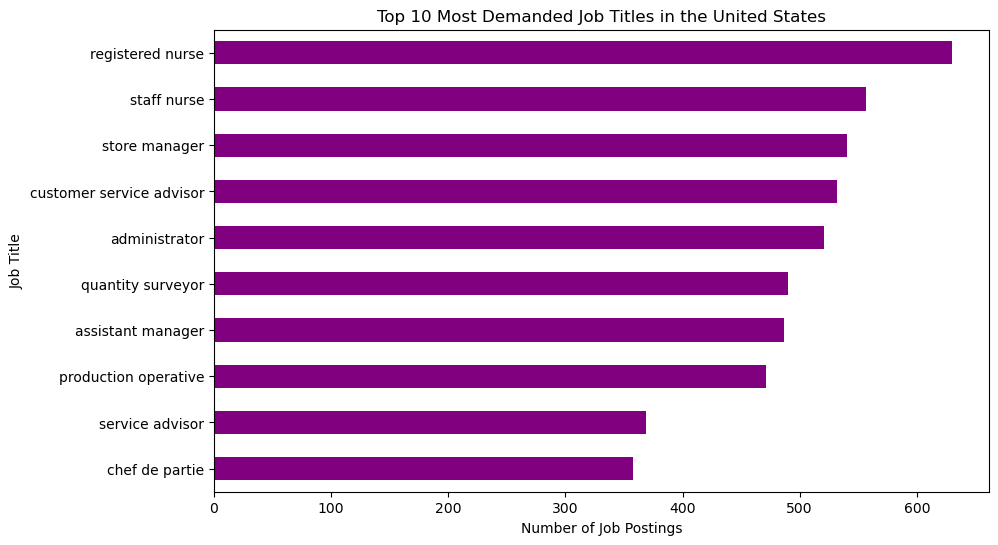

In [28]:
UK_jobs = job_posting[job_posting['search_country'] == 'united kingdom']
job_counts = UK_jobs['job_title'].value_counts()
top_10_UK_job = job_counts.head(10)

top_10_UK_job.plot(kind = 'barh', figsize = (10,6), color = 'purple')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.title('Top 10 Most Demanded Job Titles in the United States')
plt.gca().invert_yaxis() 


In [29]:
job_posting.head(1)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"[medical equipment sales, key competitors, t...",26


In [30]:
job_posting['first_seen'] = pd.to_datetime(job_posting['first_seen'])

In [31]:
job_posting['first_seen_date'] = job_posting['first_seen'].dt.date

In [32]:
job_posting['process_duration'] = (pd.to_datetime(job_posting['last_processed_time']).dt.date - job_posting['first_seen_date']).dt.days

<function matplotlib.pyplot.show(close=None, block=None)>

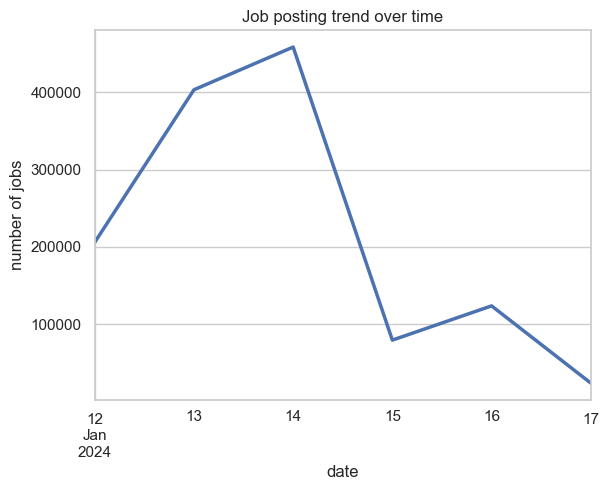

In [33]:
sns.set(style="whitegrid")

job_posting['first_seen'].value_counts().sort_index().plot(kind='line', linewidth=2.5)
plt.title('Job posting trend over time')
plt.xlabel('date')
plt.ylabel('number of jobs')
plt.show

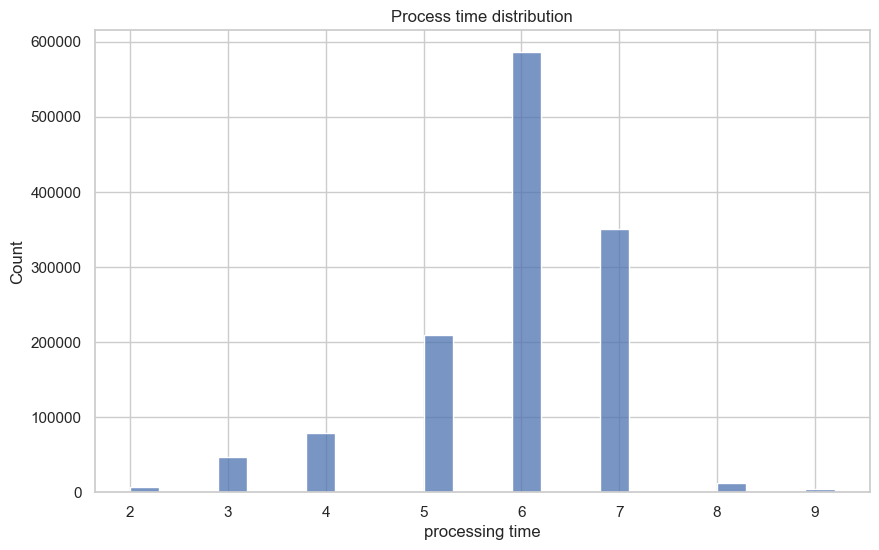

In [34]:
plt.figure(figsize=(10, 6))

sns.histplot(data = job_posting, x = 'process_duration', binwidth=0.3)
plt.xlabel("processing time")
plt.title("Process time distribution")

plt.show()

In [35]:
job_posting['job_level'].value_counts()

mid senior    1153408
associate      140910
Name: job_level, dtype: int64

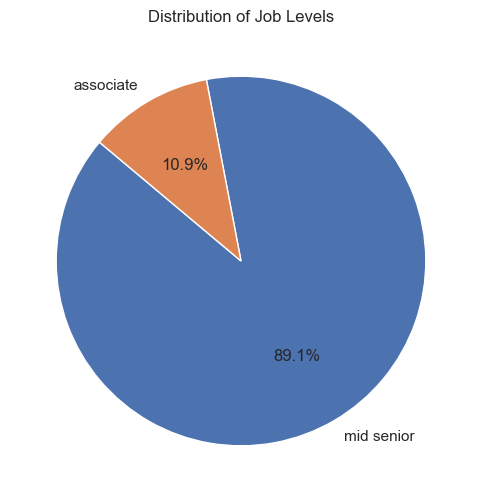

In [36]:

plt.figure(figsize=(8, 6))  # Optional: specify the size of the figure
plt.pie(job_posting['job_level'].value_counts(), labels=job_posting['job_level'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Levels')
plt.show()


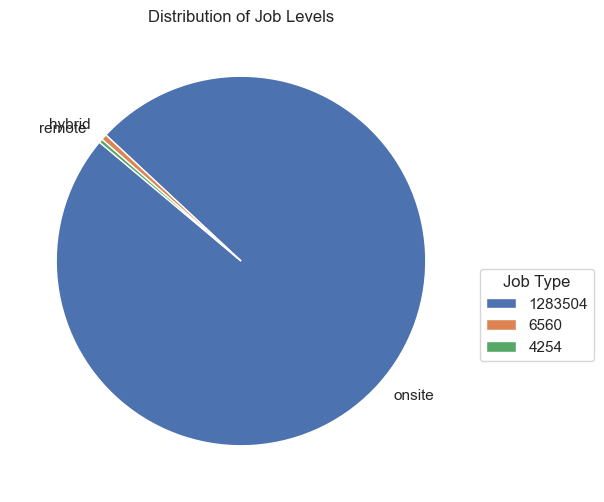

In [37]:

plt.figure(figsize=(8, 6))
plt.pie(job_posting['job_type'].value_counts(), labels=job_posting['job_type'].value_counts().index, startangle=140)
plt.title('Distribution of Job Levels')


plt.legend(job_posting['job_type'].value_counts(), title='Job Type', loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


In [38]:
job_posting.head(1)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count,first_seen_date,process_duration
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"[medical equipment sales, key competitors, t...",26,2024-01-15,6


In [39]:
from collections import Counter

In [40]:
group_skils = job_posting.groupby('job_title')['job_skills'].sum()

In [41]:
common_skills = group_skils.apply(lambda x : Counter(x).most_common(1))

In [42]:
data = []

In [43]:
for position, skills in common_skills.items():
    if skills:
        data.append([position, skills[0][0], skills[0][1]])
        
most_common_skills = pd.DataFrame(data, columns=['job_title', 'Most Common Skill', 'Occurrences'])

In [54]:
#occurence of skills in each job title
most_common_skills.sort_values(by = 'Occurrences', ascending= False).head(5)

,job_title,Most Common Skill,Occurrences
116170,customer service representative,customer service,8306
229090,lead sales associate-ft,supervisory experience,6604
163226,first year tax professional,teamwork,4546
229091,lead sales associate-pt,customer service,4525
197225,hourly supervisor and training,inventory management,4460


In [55]:
job_skills = job_skills.dropna()

In [46]:
job_skills

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."
...,...,...
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome..."
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health..."
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ..."
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R..."


In [47]:
job_skills.isna().sum()

job_link      0
job_skills    0
dtype: int64

In [48]:
job_posting.head(2)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count,first_seen_date,process_duration
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"[medical equipment sales, key competitors, t...",26,2024-01-15,6
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,registered nurse - rn care manager,trinity health mi,"norton shores, mi",2024-01-14,grand haven,united states,director nursing service,mid senior,onsite,"[nursing, bachelor of science in nursing, ma...",17,2024-01-14,7


In [49]:
print(f"You need on average {int(job_posting.skills_count.median())} skills to apply for a job on linked in")

You need on average 19 skills to apply for a job on linked in


# Recommend Job based on the skills

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = job_posting

df['job_skills_str'] = df['job_skills'].apply(lambda x: ' '.join(x))
subset_df = df.sample(frac=0.01, random_state=1)
vectorizer = CountVectorizer()

skills_matrix = vectorizer.fit_transform(subset_df['job_skills_str'])

cosine_sim = cosine_similarity(skills_matrix)

def recommend_jobs(skills):
    
    skills_str = ' '.join(skills)
    
    skills_vec = vectorizer.transform([skills_str])
    
    sim_scores = cosine_similarity(skills_vec, skills_matrix).flatten()
    
    indices = sim_scores.argsort()[::-1]
    
    return subset_df['job_title'].iloc[indices[:10]]

In [52]:
print(recommend_jobs(['cashier','sales']))

617799              account executive, industrial equipment
618832                         enterprise account executive
783945                       specialty gas sales specialist
516668          customer service representative  store # 88
485783    volunteer: lenexa thrift store cashier - ringi...
422958                         outside sales representative
621453               strategic enterprise account executive
618000                                 account executive ae
434998                                    account executive
357659                                     district manager
Name: job_title, dtype: object
